### 聚类算法实践
- Kmeans与Dbscan算法
- 半监督问题解决方案
- 聚类评估方法

In [71]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)

In [72]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

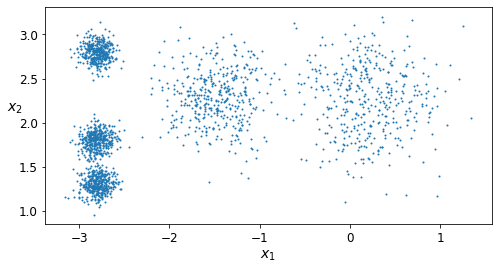

In [73]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

## 决策边界

In [74]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

fit_predict(X)与kmeans.labels_ 得到预测结果是一致的

In [75]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [76]:
# 每个点到中心点的距离
kmeans.transform(X)

array([[0.23085922, 3.04838567, 1.54568385, 1.45402521, 3.07528232],
       [0.26810747, 3.06126045, 1.48314418, 0.99002955, 3.19186267],
       [3.78216716, 1.66209651, 2.67172567, 4.09069201, 1.02742236],
       ...,
       [1.17785478, 2.89371096, 1.4073312 , 0.06769209, 3.20799557],
       [3.15905017, 0.23914671, 1.71339651, 3.05913478, 0.43887998],
       [0.43658314, 2.79657627, 1.21395695, 0.85434589, 2.95143035]])

In [77]:
# 中心点
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

## 画图

In [78]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    # 矩阵的行由第一个参数决定，列由第二个参数决定；且xx和yy的shape相同
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(
        np.c_[xx.ravel(), yy.ravel()])  # np.c_: Translates slice objects to concatenation along the second axis.
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")  # 画轮廓线的填充
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, color='k')  # 画轮廓线

    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

array.ravel() 将原数组展开成为一维数组，返回的是视图
array.flatten() 也是将原数组展开成为一维数组，但返回的是原数组的拷贝，修改不会影响原数组

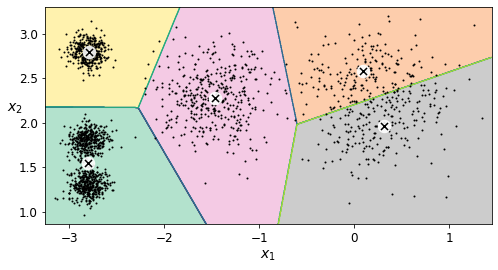

In [79]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

## 算法流程

In [80]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

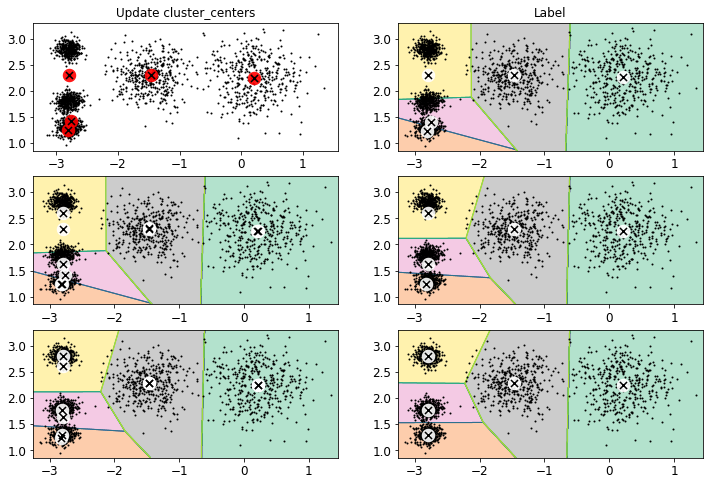

In [81]:
plt.figure(figsize=(12, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update cluster_centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter2.cluster_centers_, )

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_, )

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)

plt.show()

# 不确定的结果

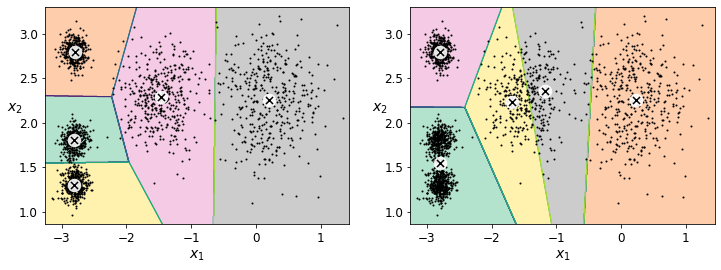

In [82]:
def plot_clusterer_comparison(c1, c2, X):
    c1.fit(X)
    c2.fit(X)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plot_decision_boundaries(c1, X)
    plt.subplot(122)
    plot_decision_boundaries(c2, X)


c1 = KMeans(n_clusters=5, init='random', n_init=1, random_state=11)
c2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=99)
plot_clusterer_comparison(c1, c2, X)

### 评估方法
- Inertia指标：每个样本与其质心的距离的平方的和

In [83]:
kmeans.inertia_

219.42800073647595

transform得到的是当前样本到每个簇中心距离

In [84]:
X_dist = kmeans.transform(X)

In [85]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [86]:
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2)

219.428000736476

In [87]:
kmeans.score(X)

-219.42800073647595

In [88]:
c1.inertia_, c2.inertia_

(211.59853725816836, 237.0272717768973)

# 找到最佳簇数
### 1、肘方法
如果k值越大，得到的结果肯定会越来越小！！！

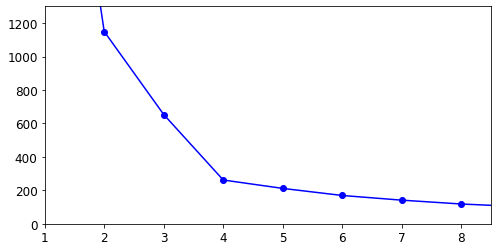

In [89]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, 'bo-')
plt.axis([1, 8.5, 0, 1300])
plt.show()

### 2、SC轮廓系数

- $ai$: 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- $bi$: 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}
![title](./3.png)

结论：
- si接近1，则说明样本i聚类合理；

- si接近-1，则说明样本i更应该分类到另外的簇；

- 若si 近似为0，则说明样本i在两个簇的边界上。

In [90]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6353422668284152

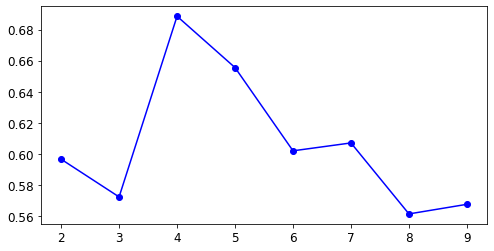

In [91]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.show()

### Kmeans存在的问题

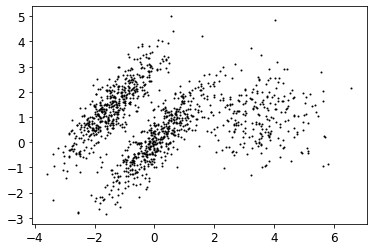

In [92]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_data(X)

In [93]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'Bad - inertia = 2179.6411978716374')

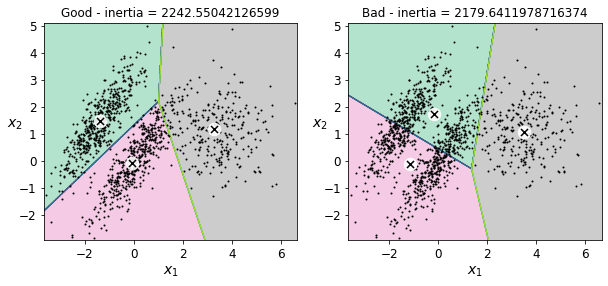

In [94]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title('Good - inertia = {}'.format(kmeans_good.inertia_))

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title('Bad - inertia = {}'.format(kmeans_bad.inertia_))

# 图像分割像例子

In [95]:
#ladybug.png
from matplotlib.image import imread

image = imread('ladybug.png')  # 将像素值转为0-1之间
image.shape

(533, 800, 3)

In [96]:
image

array([[[0.09803922, 0.11372549, 0.00784314],
        [0.09411765, 0.10980392, 0.00392157],
        [0.09411765, 0.11372549, 0.        ],
        ...,
        [0.22352941, 0.4117647 , 0.08235294],
        [0.21960784, 0.40392157, 0.08627451],
        [0.20392157, 0.3882353 , 0.07450981]],

       [[0.09411765, 0.10980392, 0.00392157],
        [0.09019608, 0.10588235, 0.        ],
        [0.09019608, 0.10588235, 0.        ],
        ...,
        [0.23529412, 0.42352942, 0.08627451],
        [0.23137255, 0.41568628, 0.09803922],
        [0.21568628, 0.4       , 0.08627451]],

       [[0.09019608, 0.10588235, 0.00784314],
        [0.08627451, 0.10196079, 0.00392157],
        [0.08627451, 0.10196079, 0.        ],
        ...,
        [0.25882354, 0.44705883, 0.10980392],
        [0.24705882, 0.43529412, 0.10588235],
        [0.22745098, 0.4117647 , 0.09411765]],

       ...,

       [[0.05490196, 0.07058824, 0.00392157],
        [0.05490196, 0.07058824, 0.00392157],
        [0.05098039, 0

In [97]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [98]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
kmeans.cluster_centers_

array([[0.02199069, 0.10830453, 0.00567974],
       [0.98304534, 0.93267906, 0.0255405 ],
       [0.2132627 , 0.38076016, 0.05517572],
       [0.6082821 , 0.6286249 , 0.38580632],
       [0.3667924 , 0.51952356, 0.15321174],
       [0.09567662, 0.24869077, 0.01605228],
       [0.7651929 , 0.19927897, 0.04392379],
       [0.87610084, 0.71743155, 0.03685827]], dtype=float32)

In [99]:
# 将同一簇的所有点替换为簇质心的值
# ndarray传递一个值选取行索引对应的那一行
kk = kmeans.cluster_centers_[kmeans.labels_]

In [100]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(533, 800, 3)

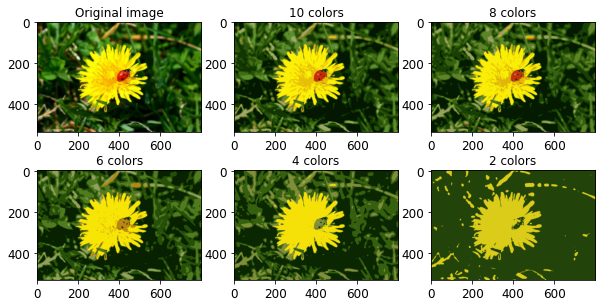

In [101]:
# 多个聚类展示
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))

# 半监督学习
首先，让我们将训练集聚类为50个集群，
然后对于每个聚类，让我们找到最靠近质心的图像。 我们将这些图像称为代表性图像：

In [102]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)  # default test_size=0.25
X_train.shape

(1347, 64)

In [103]:
# 取前50个s数据直接训练
from sklearn.linear_model import LogisticRegression

n_labeled = 50

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8266666666666667

In [104]:
# 取簇中心为50个
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [105]:
# 选取每个簇中心距离其最近的点
representative_digits_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digits_idx]

现在让我们绘制这些代表性图像并手动标记它们：

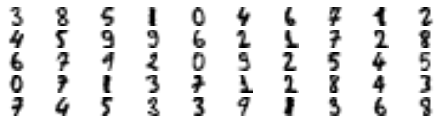

In [106]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [109]:
# 手动打标签
y_representative_digits = np.array([
    3, 8, 5, 1, 0, 4, 6, 7, 1, 2,
    4, 5, 9, 9, 6, 2, 1, 7, 2, 8,
    6, 7, 7, 2, 0, 9, 2, 5, 4, 5,
    0, 7, 1, 3, 7, 1, 2, 8, 4, 3,
    7, 4, 5, 3, 3, 9, 1, 3, 6, 8])

现在我们有一个只有50个标记实例的数据集，它们中的每一个都是其集群的代表性图像，而不是完全随机的实例。 让我们看看性能是否更好：

In [110]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8977777777777778

但也许我们可以更进一步：如果我们将标签传播到同一群集中的所有其他实例，该怎么办？

In [113]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8977777777777778

只选择前20个来试试

In [114]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]  #这是一列，每个点到各自簇中心的距离
for i in range(k):
    in_cluster = (kmeans.labels_ == i) #注意kmeans训练的是总的训练数据X_train
    cluster_dist = X_cluster_dist[in_cluster] #选择属于当前簇的所有样本
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) #排序找到前20%，该函数返回第20%个数
    above_cutoff = (X_cluster_dist > cutoff_distance) # False True结果
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9133333333333333

# DBSCAN

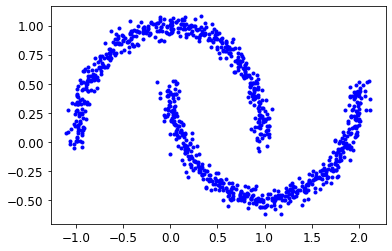

In [115]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.plot(X[:,0],X[:,1],'b.')

In [116]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [117]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [118]:
dbscan2 = DBSCAN(eps = 0.2,min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

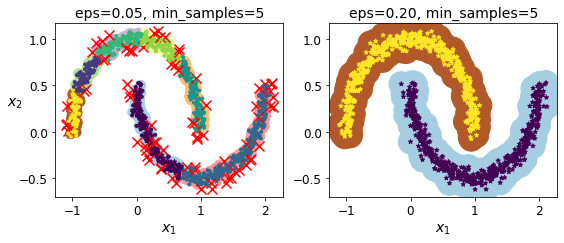

In [119]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()